## 城市代码

In [1]:
import json
codes = json.load(open('./code.json'))

## 统计局数据

In [20]:
from cnstats.stats import stats as query
import pandas as pd

In [3]:
def transform(rows):
    rr = []
    for item in rows:
        rr.append(dict(
            city = codes[item[2]],
            code = item[2],
            year = item[3],
            value = item[4]
        ))
    data = pd.DataFrame(rr)
    data['value'] = data['value'].astype('float')
    data['name'] = data['city'].str.slice(0,2)
    data = data.pivot_table(values='value', index='year', columns='name')
    return data

In [4]:
category = [
    dict(name='人口出生率', code='A030201'),

    dict(name='全体居民人均可支配收入', code='A0A0101'),
    dict(name='全体居民人均消费支出', code='A0A0201'),
    # dict(name='社会消费品零售总额', code='A0H01'),
    # dict(name='城镇登记失业率', code='A040C02'),

    # dict(name='城镇单位就业人员平均工资', code='A040701'),
    # dict(name='城镇国有单位就业人员平均工资', code='A040703'),

    # dict(name='城镇单位就业人员工资总额', code='A040601'),
    # dict(name='国有城镇单位就业人员工资总额', code='A040602'),

    # dict(name='年末常住人口', code='A030101'),
    # dict(name='城镇人口', code='A030102'),

    # dict(name='城镇单位就业人员', code='A040101'),

    # dict(name='地区生产总值', code='A020101'),
    # dict(name='接待国际游客', code='A0K0201'),
    
    # dict(name='6岁及6岁以上人口数(人口抽样调查)', code='A03080601'),
    # dict(name='6岁及6岁以上大专及以上人口数(人口抽样调查)', code='A0308060G'),

    # dict(name='6岁及6岁以上女性人口数(人口抽样调查)', code='A03080603'),
    # dict(name='6岁及6岁以上大专及以上女性人口数(人口抽样调查)', code='A0308060I'),
]

In [21]:
def getData(name, code):
    result = query(zbcode=code, datestr='LAST20', dbcode='fsnd', rowcode='reg')
    data = transform(result)
    print(name)
    data.to_csv(name + '.csv')
    return data

In [22]:
birth_rate = getData(**category[0])
birth_rate.head()

人口出生率


name,上海,云南,内蒙,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙
year,,,,,,,,,,,,,,,,,,,,,
2005,7.04,14.72,10.08,6.29,7.89,9.70,7.44,15.93,12.43,12.14,...,11.90,12.59,11.6,17.94,14.59,7.01,9.4,10.02,15.70,7.87
2006,7.47,13.20,9.87,6.26,7.67,9.14,7.67,15.53,12.60,11.60,...,11.92,12.86,12.0,17.40,13.97,6.40,9.9,10.19,15.24,7.57
2007,9.07,13.08,10.21,8.32,7.55,9.21,7.91,14.80,12.75,11.11,...,11.96,13.14,11.9,16.40,13.28,6.89,10.1,10.21,14.93,7.88
2008,8.89,12.63,9.81,8.17,6.65,9.54,8.13,14.31,13.05,11.25,...,12.68,13.22,12.2,15.50,13.49,6.32,10.1,10.29,14.49,7.91
2009,8.64,12.53,9.57,8.06,6.69,9.15,8.30,14.38,13.07,11.70,...,13.05,13.32,12.2,15.31,13.65,6.06,9.9,10.24,14.51,7.48


In [7]:
disposable_income = getData(**category[1])
disposable_income.head()

全体居民人均可支配收入


name,上海,云南,内蒙,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙
year,,,,,,,,,,,,,,,,,,,,,
2005,17738.0,4197.0,5985.0,16853.0,6010.0,4703.0,10255.0,4918.0,4777.0,6860.0,...,5664.0,3962.0,8042.0,3630.0,3625.0,6979.0,5942.0,4395.0,4587.0,6048.0
2006,19647.0,4664.0,6876.0,19296.0,6757.0,5247.0,11526.0,5576.0,5573.0,7795.0,...,6364.0,4428.0,8948.0,3828.0,4016.0,7937.0,6632.0,5029.0,5113.0,6748.0
2007,22459.0,5469.0,8340.0,21458.0,7791.0,6322.0,13116.0,6630.0,6724.0,9085.0,...,7587.0,5037.0,10138.0,4609.0,4817.0,9421.0,7520.0,5974.0,5916.0,7656.0
2008,25385.0,6492.0,9923.0,24371.0,8921.0,7413.0,15444.0,7924.0,7893.0,10411.0,...,8804.0,5782.0,11785.0,5249.0,5533.0,11125.0,8756.0,7263.0,6808.0,8877.0
2009,27500.0,7170.0,11015.0,26571.0,9671.0,8214.0,16967.0,8742.0,8683.0,11398.0,...,9745.0,6454.0,12985.0,5807.0,6099.0,12183.0,9688.0,8122.0,7553.0,9643.0


In [8]:
consumption_expenditure = getData(**category[2])
consumption_expenditure.head()

全体居民人均消费支出


name,上海,云南,内蒙,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙
year,,,,,,,,,,,,,,,,,,,,,
2005,14135.0,3379.0,4746.0,13289.0,4677.0,3926.0,8227.0,3996.0,3742.0,4740.0,...,4805.0,3392.0,6290.0,3398.0,2872.0,5657.0,5117.0,3735.0,4105.0,4727.0
2006,15284.0,3855.0,5385.0,15123.0,5183.0,4302.0,9072.0,4479.0,4290.0,5443.0,...,5370.0,3630.0,7068.0,3141.0,3158.0,6182.0,5603.0,4366.0,4434.0,5085.0
2007,18001.0,4415.0,6578.0,15933.0,6010.0,5048.0,10352.0,4981.0,5045.0,6249.0,...,6098.0,4130.0,8084.0,3693.0,3691.0,7241.0,6138.0,5050.0,5184.0,5883.0
2008,20345.0,5129.0,7706.0,17447.0,6817.0,5804.0,11641.0,6172.0,5887.0,7128.0,...,6951.0,4670.0,9358.0,3927.0,4123.0,8652.0,7074.0,5972.0,5952.0,7008.0
2009,22230.0,5524.0,8873.0,19381.0,7677.0,7078.0,12974.0,6746.0,6510.0,7794.0,...,7615.0,5258.0,10287.0,4347.0,4594.0,9587.0,7843.0,6708.0,6619.0,7863.0


## 预处理

In [73]:
series = disposable_income.ewm(span=3).mean()
x1 = series.iloc[-1] / series.iloc[-8]

In [74]:
series = (consumption_expenditure).ewm(span=3).mean()
a2 = series.iloc[-1].rank()
x2 = (a2 - a2.min())/ (a2.max() - a2.min())

In [75]:
y = birth_rate.iloc[-1]

In [80]:
pd.DataFrame([x1, x2, y], index=['人均可支配收入增长率', '人均消费支出排名', '生育率']).T.sort_values('生育率').to_csv('data.csv')

In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def linear_regression_analysis(X, y):
    X = np.column_stack(X)
    y = np.array(y)

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    print("\n回归方程:")
    print(f"y = {model.intercept_:.4f} + {model.coef_[0]:.4f}*x1 + {model.coef_[1]:.4f}*x2")
    print(f"\n决定系数 (R²): {r2:.4f}")

In [78]:
linear_regression_analysis([x1, x2], y)


回归方程:
y = -12.9309 + 12.3028*x1 + -2.3563*x2

决定系数 (R²): 0.6890



回归方程:
y = -12.9309 + 12.3028*x1 + -2.3563*x2

决定系数 (R²): 0.6890


/opt/miniconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/miniconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/miniconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/miniconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/miniconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/opt/miniconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDE

(LinearRegression(), 0.6890455817106078)

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/ev

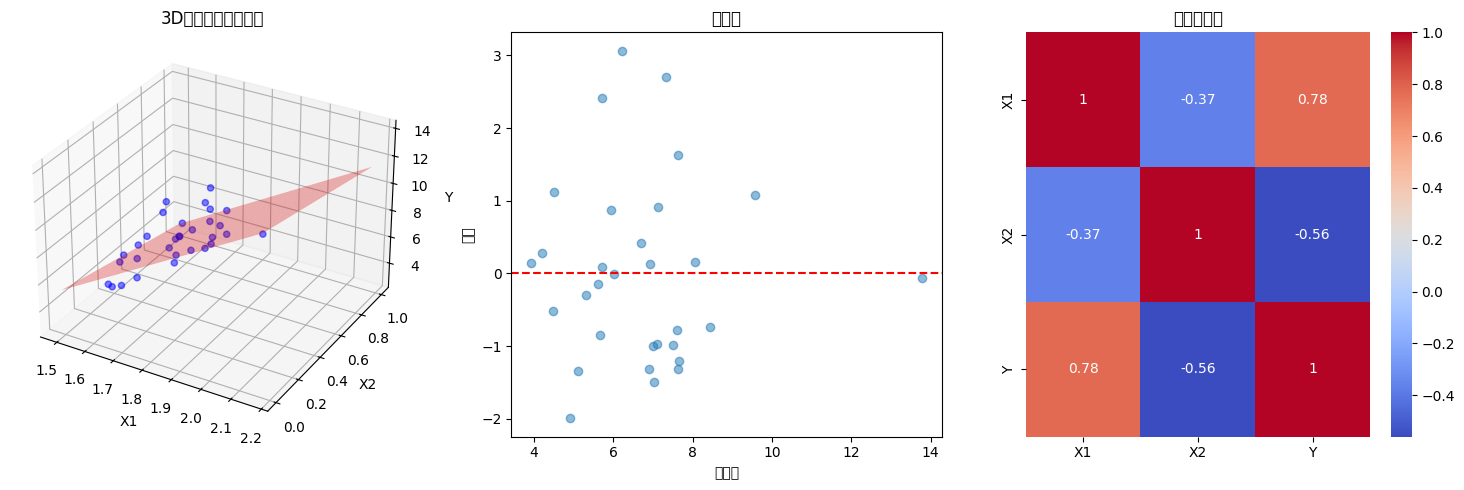

In [79]:
multiple_linear_regression_analysis(x1, x2, y)

In [82]:
# Plotting with smaller text and more distance from the points
plt.figure(figsize=(10, 6))

# Scatter plot with solid circles
scatter = plt.scatter(data['Income Growth Rate'], data['Fertility Rate'], 
                      c=data['Consumption Expenditure Rank'], cmap=cmap, norm=norm, s=50, marker='o', edgecolors='none')

# Plot the regression line
plt.plot(data['Income Growth Rate'], y_pred, color='black', lw=2, linestyle='--')

# Adjusting text placement to be smaller and further away from the points
for i, row in data.iterrows():
    plt.text(row['Income Growth Rate'] + 0.01, row['Fertility Rate'], row['Region'], fontsize=8, ha='left', va='center', color='black')

# Adding labels and title
plt.title('Fertility Rate vs. Income Growth Rate with Consumption Expenditure Ranking', fontsize=14)
plt.xlabel('Income Growth Rate', fontsize=12)
plt.ylabel('Fertility Rate', fontsize=12)

# Remove the color bar
# Display the plot
plt.grid(True)
plt.show()


KeyError: 'Income Growth Rate'

<Figure size 1000x600 with 0 Axes>

/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 25903 (\N{CJK UNIFIED IDEOGRAPH-652F}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/opt/miniconda3/lib/python3.12/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 37197 (\N{CJK UNIFIED IDEOGRAPH-914D}) missing from font(s) DejaVu Sans.
  self._fi

<Figure size 1000x600 with 0 Axes>

/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25903 (\N{CJK UNIFIED IDEOGRAPH-652F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37197 (\N{CJK UNIFIED IDEOGRAPH-914D}) missing from font(s) 

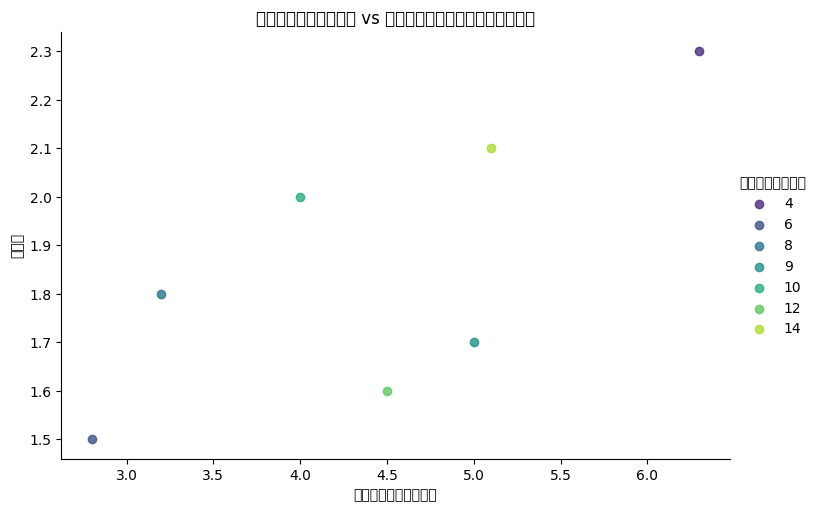

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设有一个数据框 'data'，包含人均可支配收入增长率、生育率和人均消费支出排名
# 示例数据
# data = {
#     '人均可支配收入增长率': [4.5, 3.2, 5.1, 2.8, 4.0, 6.3, 5.0],
#     '生育率': [1.6, 1.8, 2.1, 1.5, 2.0, 2.3, 1.7],
#     '人均消费支出排名': [12, 8, 14, 6, 10, 4, 9]
# }

df = pd.DataFrame(data)

# 使用 seaborn 绘制带有线性回归的散点图
plt.figure(figsize=(10, 6))
sns.lmplot(x='人均可支配收入增长率', y='生育率', data=df, hue='人均消费支出排名', palette='viridis', aspect=1.5)

# 添加标题和标签
plt.title('人均可支配收入增长率 vs 生育率（人均消费支出排名染色）')
plt.xlabel('人均可支配收入增长率')
plt.ylabel('生育率')

# 显示图形
plt.show()